## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("data/kc_house_data.csv")
f = open('data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
hd[hd['sqft_living'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362


In [6]:
hd = hd[(hd["price"] <= 1300000) & (hd["price"] >= 650000)& (hd["bedrooms"] >=2) & (hd["bedrooms"] <=5)]

In [7]:
# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

<ipython-input-8-8500cbd24740>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd["zip"] = hd.address.str[-20:-15]
<ipython-input-8-8500cbd24740>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd["zip"] = hd["zip"].astype(int)


In [9]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["years_old"] = 2023-hd["yr_built"]

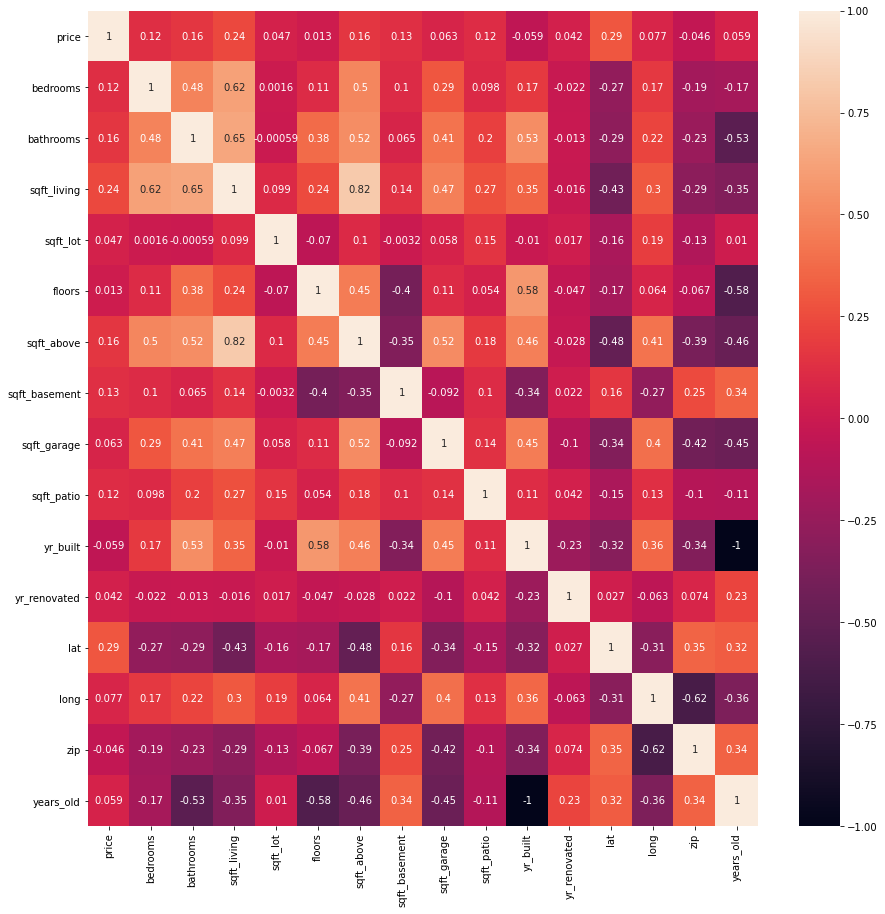

In [10]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [11]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
lat              0.290438
sqft_living      0.239954
sqft_above       0.162608
bathrooms        0.157956
sqft_basement    0.129802
bedrooms         0.123515
sqft_patio       0.115665
long             0.077145
sqft_garage      0.063373
years_old        0.058719
yr_built         0.058719
sqft_lot         0.047311
zip              0.046423
yr_renovated     0.042165
floors           0.012594
Name: price, dtype: float64

In [12]:
hd

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,years_old
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055,54
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,98133,73
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200,98118,13
7,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,...,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625,98030,4
8,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320,98023,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30145,12/27/2021,705000.0,3,2.5,2260,50965,2.0,NO,NO,NO,...,0,480,200,1998,0,"46533 Southeast 156th Place, North Bend, Washi...",47.457410,-121.719630,98045,25
30147,2/28/2022,665000.0,3,2.5,2100,7210,2.0,NO,NO,NO,...,0,440,40,1979,0,"5218 South 302nd Place, Auburn, Washington 980...",47.331160,-122.268565,98001,44
30149,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620,98117,16
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.295850,98122,28


## Simple Linear Regression - Baseline Model with Train-Test Split

In [13]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 10502 rows and 25 columns
y_train is a Series with 10502 values


In [14]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Fit our model
baseline_train_model = sm.OLS(y_train, sm.add_constant(baseline_X_train)).fit()
baseline_train_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     677.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          9.41e-145
Time:                        14:30:48   Log-Likelihood:            -1.4173e+05
No. Observations:               10502   AIC:                         2.835e+05
Df Residuals:                   10500   BIC:                         2.835e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.709e+05   5312.094    145.123      0.000     7.6e+05    7.81e+05
sqft_living    65.9547      2.534     26.025      0.000      60.987      70.922
==============================================================================
Omnibus:                      931.709   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.795
Skew:                           0.515   Prob(JB):                    3.60e-146
Kurtosis:                       2.313   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

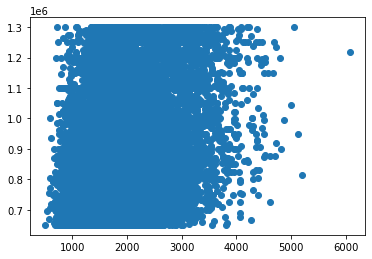

In [15]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Add School Data

Data from https://data.wa.gov/education/Report-Card-Assessment-Data-2021-22-School-Year/v928-8kke and https://eds.ospi.k12.wa.us/directoryeds.aspx

In [16]:
#Import school data
rc = pd.read_csv("data/Report_Card_Assessment_Data_2021-22_School_Year.csv")
addresses=pd.read_csv("data/Washington_School_Directory_20230214.csv")

#Clean up Addresses dataframe
addresses["ZipCode"] = addresses["ZipCode"].apply(lambda x: x[:5])
non_waaddresses = addresses[~addresses['ZipCode'].isin(zips)]
addresses.drop(index = non_waaddresses.index, inplace = True, axis = 0)
addresses=addresses[["SchoolName", "ZipCode"]]

#Clean up Report Card dataframe
rc = rc[["OrganizationLevel", "County", "SchoolName", "GradeLevel", "TestSubject", "PercentMetStandard"]]
rc = rc[rc["County"] == "King"].drop(columns=["County"])
rc = rc[rc["OrganizationLevel"] == "School"].drop(columns=["OrganizationLevel"])
rc = rc[rc["GradeLevel"] == "All Grades"].drop(columns=["GradeLevel"])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
#Standardize data under percent met standard column
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("Suppressed: N<10", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("No Students", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("%"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip(">"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("<"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].astype(float)

#Average test scores and create a ratings column
rc = rc.groupby(["SchoolName"]).aggregate({"PercentMetStandard":"mean"}).sort_values(by=["SchoolName"]).reset_index()
rc["rating"] = rc["PercentMetStandard"]/10

In [18]:
#Join dataframes and remove excess columns
schools = rc.merge(addresses, left_on="SchoolName", right_on="SchoolName")
schools = schools[["SchoolName", "rating", "ZipCode"]]
schools["ZipCode"] = schools["ZipCode"].astype(int)

In [19]:
#Create dictionary with zips and ratings
schools_dict = dict(zip(schools.ZipCode, round(schools.rating, 1)))

#Add ratings to the X_train dataframe using zips
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-19-24ed13bd47bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


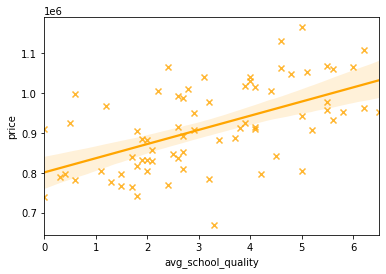

In [20]:
#Create dataframe with average sale price, average school rating, and zip
prices = hd[["zip", "price"]].groupby(by=["zip"]).mean().reset_index()
schools = X_train[["avg_school_quality", "zip"]].groupby(by=["zip"]).mean().reset_index()
schools_prices = prices.merge(schools, left_on="zip", right_on="zip")

#Visualize relationship between average sale price and average school rating
plot = sns.regplot(x=schools_prices["avg_school_quality"], y=schools_prices["price"], color = "orange", marker = "x");

In [21]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-21-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-21-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-21-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [22]:
X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
X_train.drop('yr_renovated', axis = 1, inplace = True)
X_train['renovated'].value_counts()

<ipython-input-22-e970d81e40db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['renovated'] = np.where(X_train['yr_renovated'] > 0, 1, 0)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0    10108
1      394
Name: renovated, dtype: int64

In [23]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance', 'renovated'], drop_first = True)

In [24]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [25]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10502 entries, 22384 to 15712
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                10502 non-null  object 
 1   bedrooms            10502 non-null  float64
 2   bathrooms           10502 non-null  float64
 3   sqft_living         10502 non-null  float64
 4   sqft_lot            10502 non-null  float64
 5   floors              10502 non-null  float64
 6   view                10502 non-null  float64
 7   condition           10502 non-null  float64
 8   grade               10502 non-null  float64
 9   sqft_above          10502 non-null  float64
 10  sqft_basement       10502 non-null  float64
 11  sqft_garage         10502 non-null  float64
 12  sqft_patio          10502 non-null  float64
 13  yr_built            10502 non-null  float64
 14  zip                 10502 non-null  float64
 15  years_old           10502 non-null  float64
 16  

# All Variable Model

In [26]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date"])
all_variable_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10502 entries, 22384 to 15712
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            10502 non-null  float64
 1   bathrooms           10502 non-null  float64
 2   sqft_living         10502 non-null  float64
 3   sqft_lot            10502 non-null  float64
 4   floors              10502 non-null  float64
 5   view                10502 non-null  float64
 6   condition           10502 non-null  float64
 7   grade               10502 non-null  float64
 8   sqft_above          10502 non-null  float64
 9   sqft_basement       10502 non-null  float64
 10  sqft_garage         10502 non-null  float64
 11  sqft_patio          10502 non-null  float64
 12  yr_built            10502 non-null  float64
 13  zip                 10502 non-null  float64
 14  years_old           10502 non-null  float64
 15  avg_school_quality  10502 non-null  float64
 16  

In [27]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:51   Log-Likelihood:            -1.4091e+05
No. Observations:               10502   AIC:                         2.819e+05
Df Residuals:                   10481   BIC:                         2.820e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.361e+05   1.09e+05      2.165      0.030    2.23e+04     4.5e+05
bedrooms           -3275.4604   2612.576     -1.254      0.210   -8396.606    1845.685
bathrooms           2.678e+04   3539.624      7.566      0.000    1.98e+04    3.37e+04
sqft_living           34.4335      7.851      4.386      0.000      19.044      49.823
sqft_lot               0.0869      0.032      2.749      0.006       0.025       0.149
floors             -7123.6089   4261.062     -1.672      0.095   -1.55e+04    1228.883
view                1.046e+04   2486.614      4.208      0.000    5589.111    1.53e+04
condition            1.24e+04   2630.024      4.715      0.000    7244.975    1.76e+04
grade               6.557e+04   2756.739     23.784      0.000    6.02e+04     7.1e+04
sqft_above             6.0533      8.053      0.752      0.452      -9.732      21.839
sqft_basement         11.3195      5.874      1.927      0.054      -0.194      22.833
sqft_garage          -22.9541      8.241     -2.785      0.005     -39.109      -6.800
sqft_patio            24.4238      7.952      3.071      0.002       8.836      40.011
yr_built            2144.6442   1842.634      1.164      0.244   -1467.269    5756.557
zip                  -45.5442     37.929     -1.201      0.230    -119.892      28.804
years_old           3604.1603   1860.637      1.937      0.053     -43.043    7251.364
avg_school_quality   2.42e+04   1030.916     23.479      0.000    2.22e+04    2.62e+04
waterfront_YES     -1.368e+04   1.69e+04     -0.811      0.417   -4.67e+04    1.94e+04
greenbelt_YES       5.071e+04   1.09e+04      4.658      0.000    2.94e+04    7.21e+04
nuisance_YES       -9592.6130   4336.706     -2.212      0.027   -1.81e+04   -1091.843
renovated_1         7225.2729   8927.913      0.809      0.418   -1.03e+04    2.47e+04
==============================================================================
Omnibus:                      449.793   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.167
Skew:                           0.510   Prob(JB):                    1.63e-106
Kurtosis:                       2.727   Cond. No.                     6.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [28]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [29]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [30]:
select.ranking_

array([ 5,  1, 10, 16,  1,  4,  3,  1, 15, 14, 13, 11,  9, 12,  7,  2,  8,
        1,  6,  1])

In [31]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'zip', 'years_old', 'avg_school_quality',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'renovated_1'],
      dtype='object')

In [32]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,5
bathrooms,1
sqft_living,10
sqft_lot,16
floors,1
view,4
condition,3
grade,1
sqft_above,15
sqft_basement,14


In [33]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
rfe_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          4.60e-312
Time:                        14:30:51   Log-Likelihood:            -1.4133e+05
No. Observations:               10502   AIC:                         2.827e+05
Df Residuals:                   10495   BIC:                         2.827e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                3.89e+05   1.59e+04     24.451      0.000    3.58e+05     4.2e+05
bathrooms           3.098e+04   2769.684     11.184      0.000    2.55e+04    3.64e+04
floors             -5.092e+04   3414.568    -14.914      0.000   -5.76e+04   -4.42e+04
grade               5.852e+04   2444.133     23.943      0.000    5.37e+04    6.33e+04
avg_school_quality  2.518e+04   1039.384     24.222      0.000    2.31e+04    2.72e+04
greenbelt_YES       3.197e+04   1.06e+04      3.027      0.002    1.13e+04    5.27e+04
waterfront_YES      3.453e+04   1.43e+04      2.412      0.016    6468.035    6.26e+04
==============================================================================
Omnibus:                      618.366   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.303
Skew:                           0.509   Prob(JB):                    3.93e-124
Kurtosis:                       2.489   Cond. No.                         86.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation

In [34]:
# # set up figure for predictor variables in all_variable_X
# fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# # for each col in X_third, plot distribution
# for col, ax in zip(all_variable_X, axes.flatten()):
#     ax.hist(all_variable_X[col], bins='auto')
#     ax.set_title(col)
    
# fig.tight_layout()

In [35]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [36]:
X_logs

,sqft_living,sqft_above,years_old
22384,1180.0,1180.0,93.0
9756,1880.0,1100.0,61.0
17899,1960.0,1960.0,51.0
16691,790.0,790.0,73.0
24274,2260.0,2260.0,83.0
...,...,...,...
11253,1400.0,1400.0,63.0
28948,1500.0,1500.0,98.0
11708,920.0,920.0,121.0
1862,2400.0,2400.0,96.0


In [37]:
X_logs.describe()

,sqft_living,sqft_above,years_old
count,10502.000000,10502.000000,10502.000000
mean,1982.977299,1697.212588,48.334184
std,677.664564,676.599141,32.690724
min,3.149381,3.149381,1.000000
25%,1480.000000,1180.000000,20.000000
50%,1890.000000,1520.000000,46.000000
75%,2400.000000,2100.000000,72.000000
max,5190.000000,4790.000000,123.000000


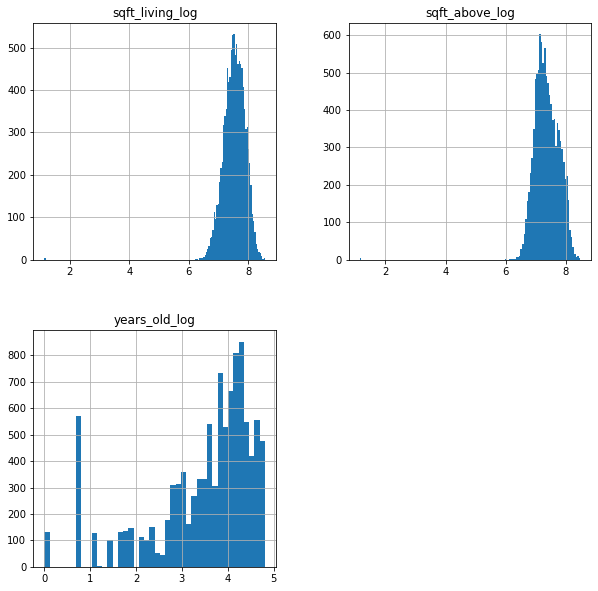

In [38]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [39]:
cont_log

,sqft_living_log,sqft_above_log,years_old_log
22384,7.073270,7.073270,4.532599
9756,7.539027,7.003065,4.110874
17899,7.580700,7.580700,3.931826
16691,6.672033,6.672033,4.290459
24274,7.723120,7.723120,4.418841
...,...,...,...
11253,7.244228,7.244228,4.143135
28948,7.313220,7.313220,4.584967
11708,6.824374,6.824374,4.795791
1862,7.783224,7.783224,4.564348


In [40]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                "yr_built", "sqft_basement", "sqft_garage", "sqft_patio"])
log_transformed

,sqft_living_log,sqft_above_log,years_old_log,bedrooms,bathrooms,floors,view,condition,grade,zip,avg_school_quality,waterfront_YES,greenbelt_YES,nuisance_YES,renovated_1
22384,7.073270,7.073270,4.532599,3.0,1.0,1.5,0.0,2.0,7.0,98115.0,5.8,0.0,0.0,0.0,0.0
9756,7.539027,7.003065,4.110874,5.0,1.0,1.0,0.0,2.0,7.0,98034.0,0.6,0.0,0.0,0.0,0.0
17899,7.580700,7.580700,3.931826,3.0,2.0,1.0,0.0,2.0,8.0,98008.0,4.8,0.0,0.0,0.0,0.0
16691,6.672033,6.672033,4.290459,2.0,1.0,1.0,0.0,3.0,6.0,98033.0,5.5,0.0,0.0,0.0,0.0
24274,7.723120,7.723120,4.418841,3.0,2.5,2.0,0.0,2.0,7.0,98177.0,2.9,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,7.244228,7.244228,4.143135,3.0,1.5,1.0,2.0,3.0,7.0,98022.0,2.0,0.0,0.0,1.0,0.0
28948,7.313220,7.313220,4.584967,3.0,1.0,1.5,0.0,3.0,6.0,98057.0,2.6,0.0,0.0,0.0,0.0
11708,6.824374,6.824374,4.795791,2.0,1.0,1.0,0.0,2.0,6.0,98117.0,5.0,0.0,0.0,0.0,1.0
1862,7.783224,7.783224,4.564348,5.0,3.0,1.5,0.0,2.0,7.0,98106.0,1.3,0.0,0.0,0.0,0.0


In [41]:
log_y = np.log(y_train)

In [42]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:52   Log-Likelihood:                 3309.5
No. Observations:               10502   AIC:                            -6587.
Df Residuals:                   10486   BIC:                            -6471.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.7930      0.117    109.359      0.000      12.564      13.022
sqft_living_log        0.1346      0.011     12.089      0.000       0.113       0.156
sqft_above_log        -0.0321      0.009     -3.660      0.000      -0.049      -0.015
years_old_log          0.0370      0.002     16.275      0.000       0.033       0.041
bedrooms              -0.0058      0.003     -2.031      0.042      -0.011      -0.000
bathrooms              0.0130      0.004      3.498      0.000       0.006       0.020
floors                 0.0002      0.004      0.053      0.958      -0.009       0.009
view                   0.0151      0.003      5.669      0.000       0.010       0.020
condition              0.0133      0.003      4.805      0.000       0.008       0.019
grade                  0.0628      0.003     21.952      0.000       0.057       0.068
zip                -6.296e-06    1.3e-06     -4.854      0.000   -8.84e-06   -3.75e-06
avg_school_quality     0.0290      0.001     26.378      0.000       0.027       0.031
waterfront_YES        -0.0127      0.018     -0.700      0.484      -0.048       0.023
greenbelt_YES          0.0423      0.012      3.587      0.000       0.019       0.065
nuisance_YES          -0.0052      0.005     -1.121      0.262      -0.014       0.004
renovated_1            0.0352      0.009      3.749      0.000       0.017       0.054
==============================================================================
Omnibus:                      369.003   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.346
Skew:                           0.237   Prob(JB):                     1.30e-51
Kurtosis:                       2.442   Cond. No.                     6.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## One Hot Encode Zip Codes

In [43]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

Index(['sqft_living_log', 'sqft_above_log', 'years_old_log', 'bedrooms',
       'bathrooms', 'floors', 'view', 'condition', 'grade',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'renovated_1', 'zip_98001.0', 'zip_98002.0', 'zip_98003.0',
       'zip_98004.0', 'zip_98005.0', 'zip_98006.0', 'zip_98007.0',
       'zip_98008.0', 'zip_98010.0', 'zip_98011.0', 'zip_98014.0',
       'zip_98019.0', 'zip_98022.0', 'zip_98023.0', 'zip_98024.0',
       'zip_98027.0', 'zip_98028.0', 'zip_98029.0', 'zip_98030.0',
       'zip_98031.0', 'zip_98032.0', 'zip_98033.0', 'zip_98034.0',
       'zip_98038.0', 'zip_98040.0', 'zip_98042.0', 'zip_98045.0',
       'zip_98047.0', 'zip_98051.0', 'zip_98052.0', 'zip_98053.0',
       'zip_98055.0', 'zip_98056.0', 'zip_98057.0', 'zip_98058.0',
       'zip_98059.0', 'zip_98065.0', 'zip_98070.0', 'zip_98072.0',
       'zip_98074.0', 'zip_98075.0', 'zip_98077.0', 'zip_98092.0',
       'zip_98102.0', 'zip_98103.0', 'zip_98105.0'

In [44]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:52   Log-Likelihood:                 5595.9
No. Observations:               10502   AIC:                        -1.102e+04
Df Residuals:                   10415   BIC:                        -1.039e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.9788      0.093    129.401      0.000      11.797      12.160
sqft_living_log        0.1759      0.009     19.275      0.000       0.158       0.194
sqft_above_log         0.1154      0.008     14.002      0.000       0.099       0.132
years_old_log          0.0065      0.002      3.220      0.001       0.003       0.011
bedrooms               0.0012      0.002      0.517      0.605      -0.003       0.006
bathrooms              0.0045      0.003      1.495      0.135      -0.001       0.010
floors                -0.0470      0.004    -11.438      0.000      -0.055      -0.039
view                   0.0260      0.002     11.574      0.000       0.022       0.030
condition              0.0309      0.002     13.523      0.000       0.026       0.035
grade                  0.0458      0.002     18.823      0.000       0.041       0.051
avg_school_quality     0.2228      0.003     85.557      0.000       0.218       0.228
waterfront_YES         0.0657      0.015      4.378      0.000       0.036       0.095
greenbelt_YES          0.0239      0.010      2.464      0.014       0.005       0.043
nuisance_YES          -0.0275      0.004     -7.142      0.000      -0.035      -0.020
renovated_1            0.0439      0.008      5.747      0.000       0.029       0.059
zip_98001.0           -1.2164      0.105    -11.637      0.000      -1.421      -1.012
zip_98002.0           -1.5042      0.112    -13.457      0.000      -1.723      -1.285
zip_98003.0           -1.5402      0.106    -14.548      0.000      -1.748      -1.333
zip_98004.0           -1.7034      0.127    -13.405      0.000      -1.952      -1.454
zip_98005.0           -1.6199      0.112    -14.415      0.000      -1.840      -1.400
zip_98006.0           -1.9352      0.108    -17.994      0.000      -2.146      -1.724
zip_98007.0           -1.1733      0.106    -11.048      0.000      -1.382      -0.965
zip_98008.0           -1.7418      0.107    -16.332      0.000      -1.951      -1.533
zip_98010.0           -2.0267      0.107    -18.962      0.000      -2.236      -1.817
zip_98011.0           -1.3478      0.106    -12.773      0.000      -1.555      -1.141
zip_98014.0           -1.8009      0.107    -16.793      0.000      -2.011      -1.591
zip_98019.0           -1.7304      0.106    -16.269      0.000      -1.939      -1.522
zip_98022.0           -1.4964      0.106    -14.146      0.000      -1.704      -1.289
zip_98023.0           -1.8315      0.106    -17.283      0.000      -2.039      -1.624
zip_98024.0           -2.0672      0.110    -18.835      0.000      -2.282      -1.852
zip_98027.0           -1.7694      0.106    -16.616      0.000      -1.978      -1.561
zip_98028.0           -2.1920      0.108    -20.263      0.000      -2.404      -1.980
zip_98029.0           -1.8172      0.1

In [45]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [46]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                         'years_old_log', 'bathrooms',
                                                         'bedrooms', 'floors', 'view',
                                                         'condition', 'grade','waterfront_YES',
                                                         'greenbelt_YES', 'nuisance_YES', 'renovated_1']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [47]:
zips_school_interaction


,98001.0,98002.0,98003.0,98004.0,98005.0,98006.0,98007.0,98008.0,98010.0,98011.0,...,bathrooms,bedrooms,floors,view,condition,grade,waterfront_YES,greenbelt_YES,nuisance_YES,renovated_1
index,,,,,,,,,,,,,,,,,,,,,
22384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.5,0.0,2.0,7.0,0.0,0.0,0.0,0.0
9756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0
17899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,...,2.0,3.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0
16691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0
24274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,3.0,2.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,3.0,1.0,2.0,3.0,7.0,0.0,0.0,1.0,0.0
28948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.5,0.0,3.0,6.0,0.0,0.0,0.0,0.0
11708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,2.0,6.0,0.0,0.0,0.0,1.0


In [48]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:52   Log-Likelihood:                 5462.9
No. Observations:               10502   AIC:                        -1.076e+04
Df Residuals:                   10417   BIC:                        -1.014e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3230      0.047    242.527      0.000      11.231      11.414
98001.0            -0.1437      0.036     -3.938      0.000      -0.215      -0.072
98002.0            -0.0650      0.025     -2.560      0.010      -0.115      -0.015
98003.0            -0.0503      0.012     -4.049      0.000      -0.075      -0.026
98004.0             0.0778      0.015      5.207      0.000       0.048       0.107
98005.0             0.0858      0.009      9.450      0.000       0.068       0.104
98006.0             0.0528      0.004     12.645      0.000       0.045       0.061
98007.0             0.1450      0.011     12.871      0.000       0.123       0.167
98008.0             0.0644      0.005     13.652      0.000       0.055       0.074
98010.0            -0.0076      0.005     -1.521      0.128      -0.017       0.002
98011.0             0.0849      0.009      9.708      0.000       0.068       0.102
98014.0             0.0248      0.006      3.960      0.000       0.013       0.037
98019.0             0.0281      0.006      4.794      0.000       0.017       0.040
98022.0            -0.0263      0.012     -2.255      0.024      -0.049      -0.003
98023.0            -0.0399      0.007     -5.702      0.000      -0.054      -0.026
98024.0             0.0311      0.005      5.745      0.000       0.020       0.042
98027.0             0.0441      0.005      8.501      0.000       0.034       0.054
98028.0             0.0289      0.004      8.179      0.000       0.022       0.036
98029.0             0.0591      0.005     12.399      0.000       0.050       0.068
98030.0            -0.0595      0.015     -3.909      0.000      -0.089      -0.030
98031.0            -0.0342      0.009     -3.783      0.000      -0.052      -0.016
98032.0            -0.0712      0.020     -3.609      0.000      -0.110      -0.033
98033.0             0.0664      0.004     15.472      0.000       0.058       0.075
98034.0             0.4369      0.034     12.827      0.000       0.370       0.504
98038.0             0.0064      0.007      0.855      0.393      -0.008       0.021
98040.0             0.0464      0.007      6.891      0.000       0.033       0.060
98042.0            -0.0132      0.004     -3.250      0.001      -0.021      -0.005
98045.0             0.0589      0.008      7.515      0.000       0.044       0.074
98047.0            -0.0305      0.023     -1.348      0.178      -0.075       0.014
98051.0             0.0245      0.012      2.028      0.043       0.001       0.048
98052.0             0.0713      0.005     14.747      0.000       0.062       0.081
98053.0             0.0633      0.006     11.106      0.000       0.052       0.074
98055.0            -0.0066      0.006     -1.163      0.245      -0.018       0.005
98056.0             0.0518      0.011      4.586      0.000

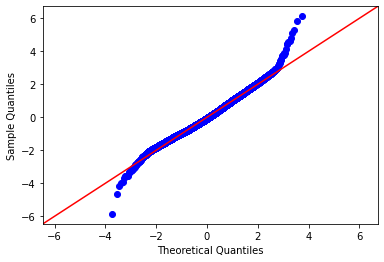

In [49]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## Testing the Fit of Our Model

In [50]:
print(f"The R-squared value for our baseline model is {baseline_train_model.rsquared:.3f}.")
print(f"The R-squared value for our all variable model is {all_variable_model.rsquared:.3f}.")
print(f"The R-squared value for our rfe model is {rfe_model.rsquared:.3f}.")
print(f"The R-squared value for our log zips model is {log_zips_model.rsquared:.3f}.")
print(f"The R-squared value for our interactions model is {interaction_model.rsquared:.3f}.")

The R-squared value for our baseline model is 0.061.
The R-squared value for our all variable model is 0.197.
The R-squared value for our rfe model is 0.130.
The R-squared value for our log zips model is 0.476.
The R-squared value for our interactions model is 0.462.


Our strongest model is the log zips model. We'll need to transform our X and y train values in the same way we did for this model.

In [51]:
#adding school data
X_test['avg_school_quality'] = X_test['zip'].map(schools_dict)
X_test.loc[X_test['avg_school_quality'].isna()] = X_test['avg_school_quality'].mean()

#convert values for view, condition, and grade
X_test["view"] = X_test["view"].replace(scale_mapper1)
X_test["condition"] = X_test["condition"].replace(scale_mapper2)
X_test["grade"] = X_test["grade"].replace(scale_mapper3)

#convert renovated columns
X_test['renovated'] = np.where(X_test['yr_renovated'] > 0, 1, 0)
X_test.drop('yr_renovated', axis = 1, inplace = True)

#one-hot encode waterfront, greenbelt, nuisance, and renovated
X_test = pd.get_dummies(X_test, columns = ['waterfront', 'greenbelt', 'nuisance', 'renovated'], drop_first = True)
X_test = X_test.drop(columns=['waterfront_NO', 'greenbelt_NO', 'nuisance_NO'])

#drop unnecessary columns
X_test = X_test.drop(columns=["heat_source", "sewer_system", "address", "lat", "long", "date"])

<ipython-input-51-df4e7a15ddf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['avg_school_quality'] = X_test['zip'].map(schools_dict)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-51-df4e7a15ddf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [52]:
#assign to X_cont
X_test_logs = X_test[log_variables]
log_columns_test = [f'{column}_log' for column in X_test_logs.columns]
cont_log_test = np.log(X_test_logs)
cont_log_test.columns = log_columns_test

log_transformed_test = cont_log_test.join(X_test).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 
                                                                  'years_old', "yr_built", "sqft_basement", 
                                                                  "sqft_garage", "sqft_patio"])



log_transformed_zips_test = pd.get_dummies(log_transformed_test, columns = ['zip'], drop_first = True)

log_y_test = np.log(y_test)

In [53]:
test_model = sm.OLS(log_y_test, sm.add_constant(log_transformed_zips_test)).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     38.46
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:53   Log-Likelihood:                 1944.2
No. Observations:                3501   AIC:                            -3714.
Df Residuals:                    3414   BIC:                            -3178.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.2516      0.147     83.242      0.000      11.963      12.540
sqft_living_log        0.1391      0.016      8.736      0.000       0.108       0.170
sqft_above_log         0.1564      0.015     10.706      0.000       0.128       0.185
years_old_log          0.0038      0.004      1.074      0.283      -0.003       0.011
bedrooms               0.0033      0.004      0.805      0.421      -0.005       0.011
bathrooms              0.0048      0.005      0.938      0.348      -0.005       0.015
floors                -0.0593      0.007     -8.300      0.000      -0.073      -0.045
view                   0.0325      0.004      8.379      0.000       0.025       0.040
condition              0.0279      0.004      7.115      0.000       0.020       0.036
grade                  0.0448      0.004     10.399      0.000       0.036       0.053
avg_school_quality     0.1966      0.003     57.580      0.000       0.190       0.203
waterfront_YES         0.0872      0.029      3.018      0.003       0.031       0.144
greenbelt_YES          0.0265      0.016      1.667      0.096      -0.005       0.058
nuisance_YES          -0.0244      0.007     -3.637      0.000      -0.038      -0.011
renovated_1            0.0385      0.013      3.036      0.002       0.014       0.063
zip_98001.0           -1.4657      0.171     -8.550      0.000      -1.802      -1.130
zip_98002.0           -1.5751      0.187     -8.429      0.000      -1.941      -1.209
zip_98003.0           -1.7511      0.169    -10.351      0.000      -2.083      -1.419
zip_98004.0           -1.8145      0.181    -10.041      0.000      -2.169      -1.460
zip_98005.0           -1.7798      0.182     -9.784      0.000      -2.136      -1.423
zip_98006.0           -2.1119      0.164    -12.902      0.000      -2.433      -1.791
zip_98007.0           -1.4039      0.169     -8.320      0.000      -1.735      -1.073
zip_98008.0           -1.8564      0.164    -11.342      0.000      -2.177      -1.536
zip_98010.0           -2.2015      0.167    -13.221      0.000      -2.528      -1.875
zip_98011.0           -1.5189      0.168     -9.039      0.000      -1.848      -1.189
zip_98014.0           -1.9665      0.168    -11.712      0.000      -2.296      -1.637
zip_98019.0           -1.8955      0.166    -11.391      0.000      -2.222      -1.569
zip_98022.0           -1.7294      0.170    -10.189      0.000      -2.062      -1.397
zip_98023.0           -2.0266      0.168    -12.098      0.000      -2.355      -1.698
zip_98024.0           -2.2236      0.167    -13.320      0.000      -2.551      -1.896
zip_98027.0           -1.8868      0.165    -11.422      0.000      -2.211      -1.563
zip_98028.0           -2.2938      0.162    -14.123      0.000      -2.612      -1.975
zip_98029.0           -1.9947      0.1

In [54]:
y_predict = log_zips_model.predict(sm.add_constant(log_transformed_zips_test))

In [55]:
residuals = log_y_test - y_predict

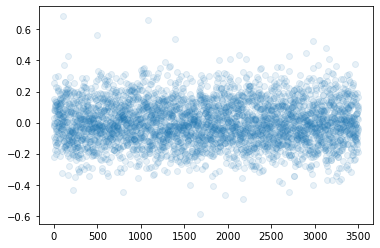

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = range(y_predict.shape[0]), y = residuals, alpha = 0.1);

## Business Question
Considering family homes (2-5 bedrooms) under $1.3 million, how can we maximize school quality and minimize house price?

In [57]:
hd.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zip', 'years_old'],
      dtype='object')

In [58]:
log_transformed_zips_test

,sqft_living_log,sqft_above_log,years_old_log,bedrooms,bathrooms,floors,view,condition,grade,avg_school_quality,...,zip_98148.0,zip_98155.0,zip_98166.0,zip_98168.0,zip_98177.0,zip_98178.0,zip_98188.0,zip_98198.0,zip_98199.0,zip_98288.0
4654,7.029973,7.029973,4.158883,3.0,1.0,1.0,0.0,2.0,7.0,2.6,...,0,0,0,0,0,0,0,0,0,0
8987,7.098376,7.098376,4.595120,2.0,1.0,1.0,0.0,2.0,7.0,2.6,...,0,0,0,0,0,0,0,0,0,0
4642,7.265430,7.090077,2.944439,3.0,2.5,2.0,0.0,2.0,8.0,6.5,...,0,0,0,0,0,0,0,0,0,0
11710,6.937314,6.937314,4.812184,2.0,1.0,1.0,0.0,3.0,7.0,5.8,...,0,0,0,0,0,0,0,0,0,0
25790,7.882315,7.467371,3.737670,4.0,4.0,1.0,0.0,2.0,8.0,1.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25686,7.915713,7.915713,0.693147,4.0,2.5,2.0,0.0,2.0,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2386,8.048788,8.048788,0.693147,5.0,2.5,2.0,0.0,2.0,8.0,4.5,...,0,0,0,0,0,0,0,0,0,0
24893,7.390181,7.154615,3.091042,3.0,3.5,2.0,0.0,2.0,7.0,2.7,...,0,0,0,0,0,0,0,0,0,0
3032,7.882315,7.882315,0.000000,4.0,2.5,2.0,0.0,2.0,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
bq_x = pd.concat([log_transformed_zips_test, log_transformed_zips])

In [60]:
bq_y = pd.concat([log_y_test, log_y])

In [61]:
bq = pd.merge(bq_y, bq_x, left_on=bq_y.index, right_on=bq_x.index)

In [62]:
bq.set_index('key_0', inplace = True)

In [63]:
y = bq["price"]
X = bq.drop(columns=["price"])

bq_model = sm.OLS(y, sm.add_constant(X)).fit()
bq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:30:53   Log-Likelihood:                 7496.7
No. Observations:               14003   AIC:                        -1.482e+04
Df Residuals:                   13915   BIC:                        -1.415e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.0276     11.996      2.086      0.037       1.514      48.541
sqft_living_log        0.1660      0.008     21.034      0.000       0.151       0.182
sqft_above_log         0.1258      0.007     17.574      0.000       0.112       0.140
years_old_log          0.0061      0.002      3.442      0.001       0.003       0.010
bedrooms               0.0018      0.002      0.883      0.377      -0.002       0.006
bathrooms              0.0047      0.003      1.814      0.070      -0.000       0.010
floors                -0.0497      0.004    -13.990      0.000      -0.057      -0.043
view                   0.0275      0.002     14.188      0.000       0.024       0.031
condition              0.0301      0.002     15.280      0.000       0.026       0.034
grade                  0.0456      0.002     21.613      0.000       0.041       0.050
avg_school_quality    -3.9240      3.824     -1.026      0.305     -11.419       3.571
waterfront_YES         0.0715      0.013      5.398      0.000       0.046       0.097
greenbelt_YES          0.0240      0.008      2.912      0.004       0.008       0.040
nuisance_YES          -0.0271      0.003     -8.136      0.000      -0.034      -0.021
renovated_1            0.0425      0.007      6.517      0.000       0.030       0.055
zip_98001.0          -11.7734      9.702     -1.213      0.225     -30.791       7.244
zip_98002.0           -7.0544      5.115     -1.379      0.168     -17.080       2.971
zip_98003.0           -6.2920      4.350     -1.447      0.148     -14.818       2.234
zip_98004.0            5.9923      7.123      0.841      0.400      -7.969      19.954
zip_98005.0            4.4080      5.593      0.788      0.431      -6.556      15.372
zip_98006.0            8.2275      9.417      0.874      0.382     -10.230      26.685
zip_98007.0           -4.2752      2.821     -1.516      0.130      -9.804       1.254
zip_98008.0            5.1244      6.358      0.806      0.420      -7.338      17.587
zip_98010.0            3.5822      5.211      0.687      0.492      -6.632      13.796
zip_98011.0           -3.6055      2.056     -1.753      0.080      -7.636       0.425
zip_98014.0            2.1541      3.682      0.585      0.559      -5.063       9.371
zip_98019.0            0.9819      2.535      0.387      0.699      -3.987       5.951
zip_98022.0           -6.2531      4.350     -1.438      0.151     -14.779       2.273
zip_98023.0           -1.6111      0.255     -6.324      0.000      -2.110      -1.112
zip_98024.0            8.1006      9.417      0.860      0.390     -10.357      26.559
zip_98027.0            3.4405      4.829      0.713      0.476      -6.024      12.905
zip_98028.0           10.4731     11.711      0.894      0.371     -12.482      33.428
zip_98029.0            6.2742      7.5

In [64]:
bq_predict = bq_model.predict(sm.add_constant(X))

In [65]:
bq_predict

key_0
4654     13.609464
8987     13.704724
4642     13.740826
11710    13.672451
25790    13.656350
           ...    
11253    13.465934
28948    13.442570
11708    13.631620
1862     13.665377
15712    13.607896
Length: 14003, dtype: float64

In [66]:
bq["prediction_sale"] = bq_predict

In [67]:
bq["price"] = np.exp(bq["price"])
bq["prediction_sale"] = np.exp(bq["prediction_sale"])
bq['residual'] = bq['price'] - bq["prediction_sale"]

In [68]:
bq

,price,sqft_living_log,sqft_above_log,years_old_log,bedrooms,bathrooms,floors,view,condition,grade,...,zip_98166.0,zip_98168.0,zip_98177.0,zip_98178.0,zip_98188.0,zip_98198.0,zip_98199.0,zip_98288.0,prediction_sale,residual
key_0,,,,,,,,,,,,,,,,,,,,,
4654,875000.0,7.029973,7.029973,4.158883,3.0,1.0,1.0,0.0,2.0,7.0,...,0,0,0,0,0,0,0,0,813795.275335,61204.724665
8987,876543.0,7.098376,7.098376,4.595120,2.0,1.0,1.0,0.0,2.0,7.0,...,0,0,0,0,0,0,0,0,895130.054005,-18587.054005
4642,750000.0,7.265430,7.090077,2.944439,3.0,2.5,2.0,0.0,2.0,8.0,...,0,0,0,0,0,0,0,0,928036.338626,-178036.338626
11710,1112000.0,6.937314,6.937314,4.812184,2.0,1.0,1.0,0.0,3.0,7.0,...,0,0,0,0,0,0,0,0,866702.775448,245297.224552
25790,835000.0,7.882315,7.467371,3.737670,4.0,4.0,1.0,0.0,2.0,8.0,...,0,0,0,0,0,0,0,0,852859.727984,-17859.727984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11253,650000.0,7.244228,7.244228,4.143135,3.0,1.5,1.0,2.0,3.0,7.0,...,0,0,0,0,0,0,0,0,704986.388805,-54986.388805
28948,685000.0,7.313220,7.313220,4.584967,3.0,1.0,1.5,0.0,3.0,6.0,...,0,0,0,0,0,0,0,0,688706.241186,-3706.241186
11708,900000.0,6.824374,6.824374,4.795791,2.0,1.0,1.0,0.0,2.0,6.0,...,0,0,0,0,0,0,0,0,832027.095706,67972.904294


In [69]:
hd_predictions = pd.merge(hd, bq[["prediction_sale", "residual"]], left_on = hd.index, right_on = bq.index)

In [70]:
hd_predictions.columns

Index(['key_0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zip', 'years_old',
       'prediction_sale', 'residual'],
      dtype='object')

In [71]:
hd_predictions=hd_predictions[["price", "prediction_sale", "residual", "zip"]]

In [72]:
hd_predictions['avg_school_quality'] = hd_predictions['zip'].map(schools_dict)

In [73]:
ss = StandardScaler()

In [74]:
hd_predictions['scaled_schools'] = ss.fit_transform(hd_predictions[['avg_school_quality']])
hd_predictions

,price,prediction_sale,residual,zip,avg_school_quality,scaled_schools
0,675000.0,6.835951e+05,-8595.135575,98055,4.2,0.659757
1,920000.0,9.506691e+05,-30669.117746,98133,2.5,-0.396798
2,775000.0,9.416613e+05,-166661.326280,98118,2.1,-0.645399
3,820000.0,7.295932e+05,90406.818048,98030,1.5,-1.018300
4,780000.0,7.221807e+05,57819.299057,98023,3.2,0.038255
...,...,...,...,...,...,...
13998,705000.0,1.056295e+06,-351295.314788,98045,2.7,-0.272497
13999,665000.0,7.168501e+05,-51850.078971,98001,0.6,-1.577653
14000,719000.0,8.887043e+05,-169704.264103,98117,5.0,1.156960
14001,800000.0,8.649890e+05,-64988.956720,98122,0.5,-1.639803


In [81]:
biz_question_averages = hd_predictions.groupby(by=["zip"]).mean().reset_index().sort_values(by=["residual"],
                                                                                            ascending= False)

biz_question_averages = biz_question_averages.dropna()

In [82]:
biz_question_averages.tail(10)

,zip,price,prediction_sale,residual,avg_school_quality,scaled_schools
0,98001,7.820384e+05,7.781179e+05,3920.481624,0.6,-1.577653
18,98030,7.667396e+05,7.631899e+05,3549.644233,1.5,-1.018300
19,98031,7.699314e+05,7.664388e+05,3492.548929,2.4,-0.458948
24,98040,1.108277e+06,1.105573e+06,2704.900753,6.2,1.902763
4,98005,1.131778e+06,1.129990e+06,1787.514353,4.6,0.908359
73,98288,9.096500e+05,9.092482e+05,401.838116,0.0,-1.950555
27,98047,6.690000e+05,6.690124e+05,-12.367293,3.3,0.100405
67,98168,7.396372e+05,7.397510e+05,-113.838977,0.0,-1.950555
1,98002,7.417000e+05,7.437155e+05,-2015.518408,1.8,-0.831850
3,98004,1.165423e+06,1.175150e+06,-9727.325743,5.0,1.156960


In [83]:
biz_question_averages.sort_values(by=["avg_school_quality"], ascending=False).head(10)

,zip,price,prediction_sale,residual,avg_school_quality,scaled_schools
46,98105,9.518301e+05,9.398910e+05,11939.064928,6.5,2.089214
16,98028,9.639811e+05,9.511254e+05,12855.616835,6.2,1.902763
24,98040,1.108277e+06,1.105573e+06,2704.900753,6.2,1.902763
41,98075,1.064952e+06,1.053794e+06,11158.056784,6.0,1.778463
52,98115,9.535116e+05,9.424009e+05,11110.763436,5.8,1.654162
5,98006,1.059911e+06,1.052168e+06,7742.979288,5.6,1.529862
14,98024,9.318920e+05,9.223635e+05,9528.450276,5.6,1.529862
21,98033,1.068909e+06,1.064553e+06,4356.412952,5.5,1.467711
72,98199,9.769242e+05,9.673434e+05,9580.807654,5.5,1.467711
48,98107,9.573870e+05,9.454908e+05,11896.146822,5.5,1.467711


In [84]:
biz_question_averages.loc[(biz_question_averages['scaled_schools'] >= 0) |
                          (biz_question_averages['residual'] <= 0)]

,zip,price,prediction_sale,residual,avg_school_quality,scaled_schools
31,98053,1.014865e+06,1.001401e+06,13463.753680,4.1,0.597607
42,98077,9.775097e+05,9.642055e+05,13304.275490,3.2,0.038255
51,98112,1.031216e+06,1.018076e+06,13140.475843,4.0,0.535457
16,98028,9.639811e+05,9.511254e+05,12855.616835,6.2,1.902763
46,98105,9.518301e+05,9.398910e+05,11939.064928,6.5,2.089214
48,98107,9.573870e+05,9.454908e+05,11896.146822,5.5,1.467711
11,98019,9.135762e+05,9.018422e+05,11734.058941,3.8,0.411156
54,98117,9.430732e+05,9.314330e+05,11640.262866,5.0,1.156960
17,98029,1.052515e+06,1.041279e+06,11235.910228,5.1,1.219110
41,98075,1.064952e+06,1.053794e+06,11158.056784,6.0,1.778463


## Conclusion

### In order to maximize the value of the house purchased, as well as the school district quality, we recommend purchasing houses 98004, Bellevue, WA.